### Fordgobike Dataset Exploration and Visualization

### by Temitope Yakub

#### Investigation Overview


I will investigate Ford GoBike System Dataset and discuss the effect of Three variables ('user_type','Trip_day of the week',and 'duration_min', and  hour) on number of trips and the relation between them.

### Dataset Overview

This document explores the Ford GoBike's trip data for public containing bike rides. The attributes included the trip start/end time, as well as additional measurements such as user type, gender, and age. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_file.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dayofweek,start_hour,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,17,869.750000,38
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,12,1030.900000,50
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thu,17,608.166667,33
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,23,26.416667,48
4,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,Thu,23,19.116667,39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169171 entries, 0 to 169170
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             169171 non-null  int64  
 1   start_time               169171 non-null  object 
 2   end_time                 169171 non-null  object 
 3   start_station_id         169171 non-null  float64
 4   start_station_name       169171 non-null  object 
 5   start_station_latitude   169171 non-null  float64
 6   start_station_longitude  169171 non-null  float64
 7   end_station_id           169171 non-null  float64
 8   end_station_name         169171 non-null  object 
 9   end_station_latitude     169171 non-null  float64
 10  end_station_longitude    169171 non-null  float64
 11  bike_id                  169171 non-null  int64  
 12  user_type                169171 non-null  object 
 13  member_birth_year        169171 non-null  int64  
 14  memb

In [5]:
# labels to use in plots
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# color to use in plots 
base_color = sn.color_palette()[0]

# Convert the start_time_dayofweek to ordinal variables.
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekday_labels)
df['start_dayofweek'] = df['start_dayofweek'].astype(ordered_weekdays)

### Bike Ride Duration Time Visualization:

The origianl duration data has right skew issue - bike durations range from less than 1 minute to 1400+ minutes with median at around 9 min and mean at around 12 min.

We have to do some data transformation to make data visualization and data interpretation easiler. 

Most rides took about (8-12) minutes. And very few rides lasted more than one hour (60 minutes).

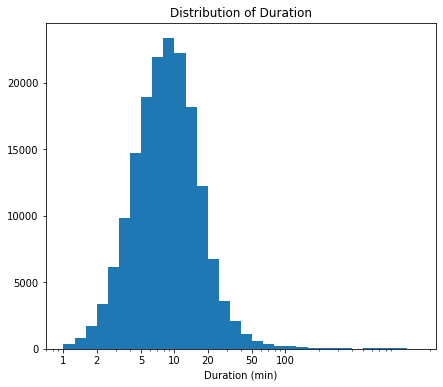

In [6]:
# plot a histogram with logarithmic scale transformation
plt.figure(figsize=[7,6])
bin_edges = 10 ** np.arange(0.0, np.log10(df.duration_min.max())+0.1, 0.1)
plt.hist(data = df, x = 'duration_min', bins = bin_edges)
plt.xscale('log')
tick_locs = [1,2,5,10, 20, 50, 100]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Duration (min)')
plt.title('Distribution of Duration');

### Daily/Weekly Bike Ride Trends and Gender Visualization:



#### Observations from below plots:
1. Monday has the highest biker counts across 7 days.
2. Females bikers rides longer than Male. 
3. Monday has the most male bikers compared to other days. It also has the most female bikers compared to other days.

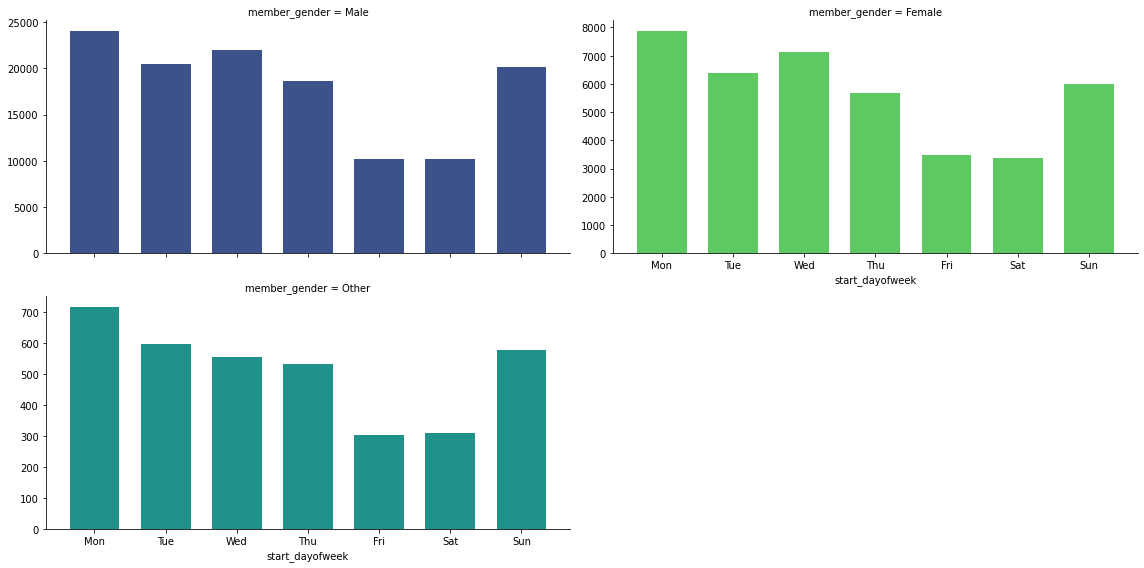

In [7]:
# facetting histograms of start_weekday against gender



#The count of member_gender
gender_order = df['member_gender'].value_counts().index
bin_edges = np.arange(-0.5, 6.5+1, 1)
g = sn.FacetGrid(data = df, col = 'member_gender',hue='member_gender', palette='viridis' , height=4, aspect=2, 
                 col_order = gender_order, col_wrap=2,  sharey=False)
g.map(plt.hist, 'start_dayofweek', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 6+1, 1), weekday_labels);




#### Trip duration on a weekday for each User type

#### Observations from below plots:

1. Both of Users type have a longer trip duration on weekend in relative to their trips during other week days.

2. It appears that customers hire bikes for amusement and enjoyment since they keep them longer than subscribers do, especially on weekends (Saturday and Sunday).

In [8]:
df_60 = df[df.duration_min <= 60]

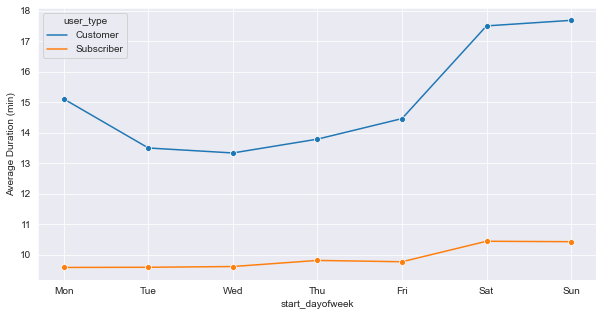

In [9]:
user_weekday_avg_mint = df_60.groupby(['user_type','start_dayofweek']).duration_min.mean()
user_weekday_avg_mint = user_weekday_avg_mint.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sn.set_style('darkgrid')
sn.lineplot(data = user_weekday_avg_mint, x='start_dayofweek', y='duration_min', hue='user_type', marker='o')
plt.xticks(np.arange(0,7), weekday_labels)
plt.ylabel('Average Duration (min)');

### Trips Duration in Week days by Gender



Observations:

Not surprising the trip duration start trending up on the weekends from Thursdays to Saturdays. Males still have the shortest bike trip.

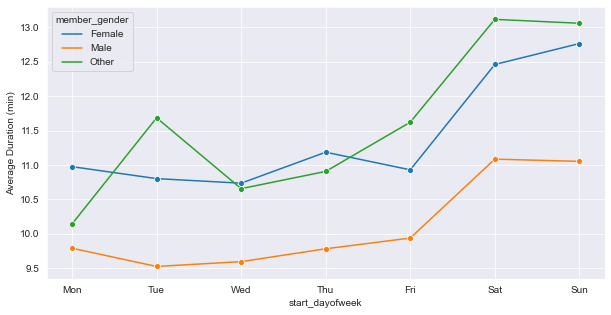

In [10]:
#some rides didn't exceed more than 60 minutes
#df_60 = df[df.duration_min <= 60]

user_weekday_avg_mint = df_60.groupby(['member_gender','start_dayofweek']).duration_min.mean()
user_weekday_avg_mint = user_weekday_avg_mint.reset_index()


# plot a line plot with colors based on user_type

plt.figure(figsize=[10,5])
sn.set_style('darkgrid')
sn.lineplot(data = user_weekday_avg_mint, x='start_dayofweek', y='duration_min', hue='member_gender', marker='o')
plt.xticks(np.arange(0,7), weekday_labels)
plt.ylabel('Average Duration (min)');
plt.show()

In [ ]:
!jupyter nbconvert fordgobike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook fordgobike_slide_deck.ipynb to slides
[NbConvertApp] Writing 687116 bytes to fordgobike_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/fordgobike_slide_deck.slides.html
Use Control-C to stop this server
